# Autoregressive (AR) Models

In this lesson, we focus on Autoregressive (AR) models, where the current value of the series is regressed on its past values.

## Understanding AR Models

An AR(p) model uses the previous p observations to predict the current value.

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  150
Model:                     AutoReg(2)   Log Likelihood                -127.716
Method:               Conditional MLE   S.D. of innovations              0.574
Date:                Fri, 28 Mar 2025   AIC                            263.432
Time:                        01:05:19   BIC                            275.421
Sample:                    01-03-2020   HQIC                           268.303
                         - 05-29-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0405      0.048      0.836      0.403      -0.054       0.135
Value.L1       0.3728      0.075      4.939      0.000       0.225       0.521
Value.L2       0.3952      0.075      5.236      0.0

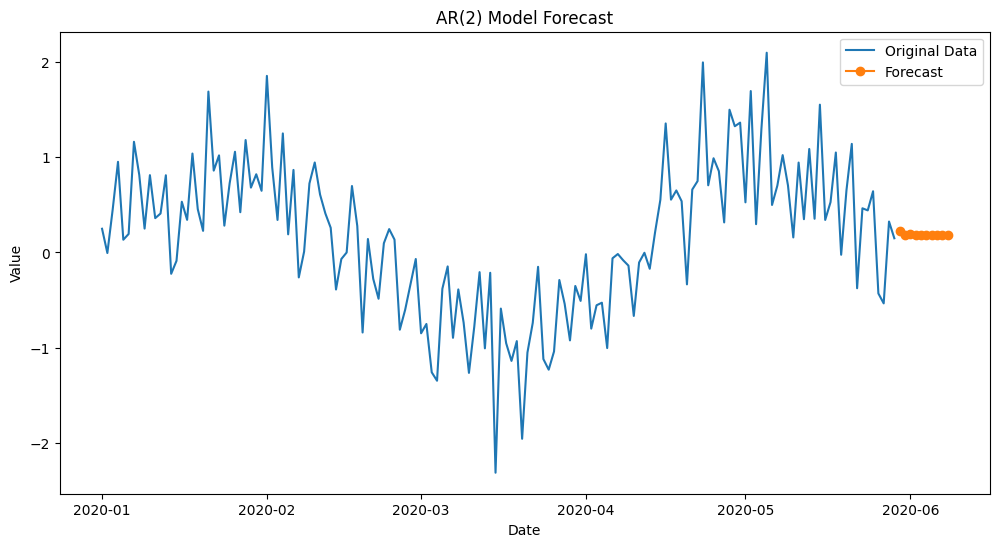

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

%matplotlib inline

# Generate synthetic time series data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=150, freq='D')
data = np.sin(np.linspace(0, 3 * np.pi, 150)) + np.random.normal(0, 0.5, 150)
ts_df = pd.DataFrame({'Date': dates, 'Value': data}).set_index('Date').asfreq('D')

# Fit an AR(2) model
model = AutoReg(ts_df['Value'], lags=2)
model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 10 steps
forecast = model_fit.predict(start=len(ts_df), end=len(ts_df)+9, dynamic=False)
print('\nForecast:')
print(forecast)

# Plot the original data and forecast
plt.figure(figsize=(12,6))
plt.plot(ts_df, label='Original Data')
forecast_dates = pd.date_range(start=ts_df.index[-1], periods=11, freq='D')[1:]
plt.plot(forecast_dates, forecast, label='Forecast', marker='o')
plt.title('AR(2) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Conclusion

We demonstrated how to fit an Autoregressive model and use it for forecasting based on past observations.